In [109]:
import pandas as pd

data = pd.read_excel("data.xlsx",index_col=0,header=(0,1))["Adj Close"]

C:\Users\olive\AppData\Local\Temp\ipykernel_20800\2553123702.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cumulative_returns.index,minor=True)


ax1.get_ylim()=(-15.543787304418114, 0.2)
focus='BA.L'
deepest.min()=-15.005702770447268
max_dur=94
start=Timestamp('2023-04-26 00:00:00')
end=Timestamp('2023-09-08 00:00:00')


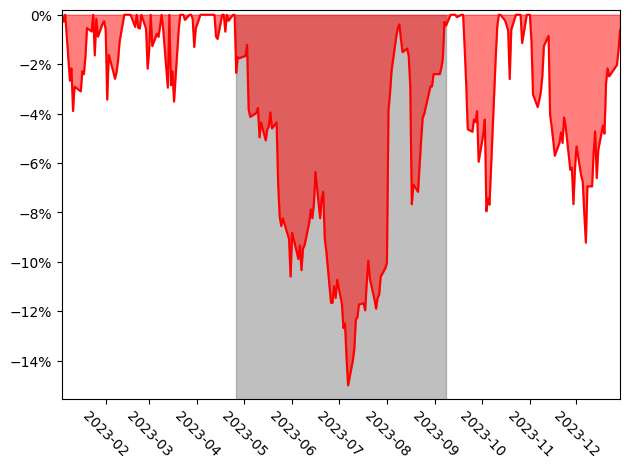

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import timedelta
from datetime import datetime

focus = data.columns[0]

log_returns = np.log(data/data.shift(1)).dropna()


fig, ax1 = plt.subplots(1,1,sharex=True)
cumulative_returns = log_returns[focus].cumsum()
# sns.lineplot(cumulative_returns[focus] * 100,ax=ax1[0])
drawdown = (cumulative_returns - cumulative_returns.cummax())
ax1.plot(drawdown * 100,color="red")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax1.fill_between(drawdown.index,drawdown*100,0,alpha=0.5,color="red")

deepest = (cumulative_returns - cumulative_returns.cummax()).cummin()*100

uwater  = (cumulative_returns - (cumulative_returns).cummax()) < 0
runs    = (~uwater).cumsum()[uwater]
counts  = runs.value_counts(sort=True).iloc[:1]
max_dur = counts.iloc[0]

inds    = runs == counts.index[0]
inds    = (inds).where(inds)
start   = inds.first_valid_index()
end     = inds.last_valid_index()

# ax1.axvline(start)
# ax1.axvline(end)

ax1.fill_betweenx([0,ax1.get_ylim()[0]],start,end,color="grey",zorder=0,alpha=0.5)
ax1.set_ylim(ax1.get_ylim()[0]+1,0.2)
ax1.set_xlim(cumulative_returns.first_valid_index(),cumulative_returns.last_valid_index())
ax1.xaxis.set_tick_params(rotation=-45)
# ax1.set_xticks(range(len(cumulative_returns)))
ax1.set_xticklabels(cumulative_returns.index.map(lambda x: datetime.strftime(x, '%Y-%m-%d')))

print(f"{ax1.get_ylim()=}")
print(f"{focus=}")
print(f"{deepest.min()=}")
print(f"{max_dur=}")
print(f"{start=}")
print(f"{end=}")
fig.tight_layout()